In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('2018-07.csv',sep=';',encoding='iso-8859-1')

In [4]:
data.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,SE,SP,Jaú,F,entre 41 a 50 anos,23/07/2018,1.0,Magazineluiza.com,Comércio Eletrônico,Produtos Eletrodomésticos e Eletrônicos,"Fogão, microondas, forno elétrico, depurador d...",Contrato / Oferta,Recusa em cancelar compra/serviço no prazo de ...,Internet,N,S,Finalizada avaliada,Resolvida,5.0,1
1,CO,DF,Brasília,M,entre 31 a 40 anos,20/07/2018,1.0,Multiplus,Programas de Fidelidade,Demais Serviços,"Programas de Fidelidade / Benefícios (pontos, ...",Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,1
2,SE,SP,Jundiaí,M,entre 21 a 30 anos,28/07/2018,7.0,Claro Celular,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Loja física,S,S,Finalizada avaliada,Resolvida,5.0,1
3,NE,BA,Eunápolis,M,entre 31 a 40 anos,27/07/2018,8.0,Oi Fixo,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança por serviço não fornecido/ em desacor...,Não comprei / contratei,N,S,Finalizada avaliada,Resolvida,5.0,1
4,NE,BA,Salvador,M,entre 31 a 40 anos,27/07/2018,8.0,Caixa Econômica Federal,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Pessoal e Demais Empréstimos (exceto f...,Cobrança / Contestação,Negativação indevida - desconhece motivo e/ou ...,Telefone,N,S,Finalizada avaliada,Resolvida,5.0,1


In [17]:
data['Grupo Problema'].value_counts()

Cobrança / Contestação    20967
Contrato / Oferta          8536
Vício de Qualidade         6949
Atendimento / SAC          5866
Informação                 5146
Entrega do Produto         1981
Saúde e Segurança           265
Name: Grupo Problema, dtype: int64

In [13]:
data.groupby('Sexo')[u'Faixa Etária'].value_counts()

Sexo  Faixa Etária      
F     entre 31 a 40 anos     6177
      entre 21 a 30 anos     6139
      entre 41 a 50 anos     3274
      entre 51 a 60 anos     2420
      entre 61 a 70 anos     1597
      mais de 70 anos         637
      até 20 anos             588
M     entre 31 a 40 anos    10005
      entre 21 a 30 anos     9640
      entre 41 a 50 anos     4218
      entre 51 a 60 anos     2419
      entre 61 a 70 anos     1298
      até 20 anos             785
      mais de 70 anos         513
Name: Faixa Etária, dtype: int64

In [18]:
segmento = data[data['Grupo Problema'] == 'Cobrança / Contestação']

In [21]:
segmento['Segmento de Mercado'].value_counts()

Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    10074
Bancos, Financeiras e Administradoras de Cartão                             6924
Transporte Aéreo                                                             826
Comércio Eletrônico                                                          608
Energia Elétrica, Gás, Água e Esgoto                                         428
Empresas de Intermediação de Serviços / Negócios                             383
Empresas de Recuperação de Crédito                                           211
Empresas de Pagamento Eletrônico                                             211
Perfumaria, Cosméticos e Higiene Pessoal                                     192
Bancos de Dados e Cadastros de Consumidores                                  184
Operadoras de Planos de Saúde e Administradoras de Benefícios                171
Agências de Viagens                                                          166
Varejo                      

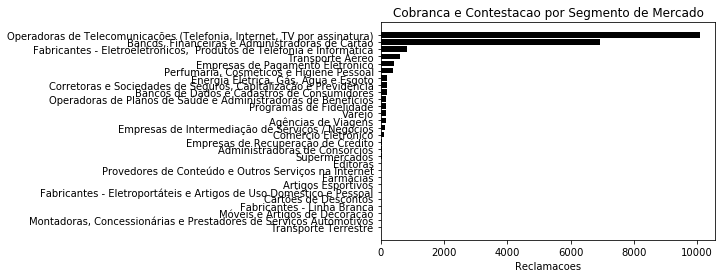

In [22]:
fig, ax = plt.subplots()
y_pos = np.arange(len(segmento['Segmento de Mercado'].value_counts()))
values = segmento['Segmento de Mercado'].value_counts()
segmentos = segmento['Segmento de Mercado'].unique()
ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Cobranca e Contestacao por Segmento de Mercado')
plt.show()

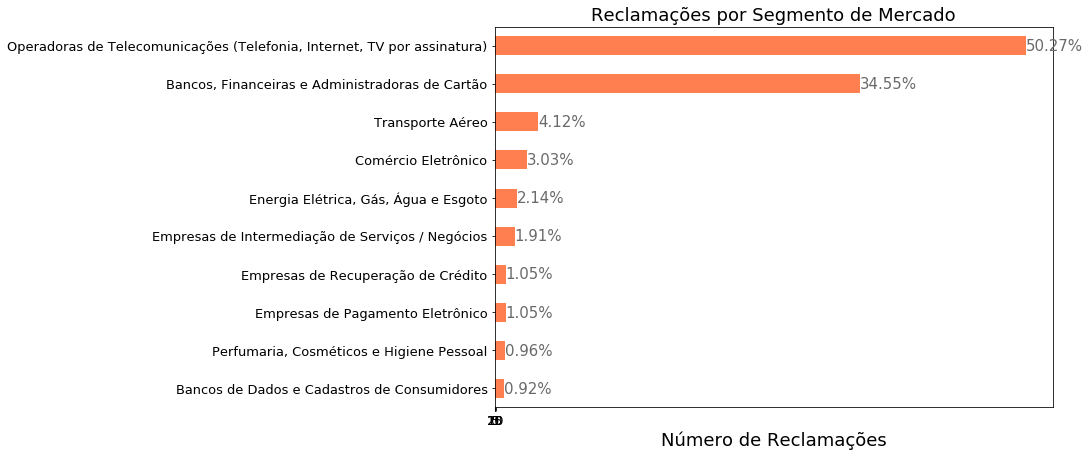

In [31]:
ax = segmento['Segmento de Mercado'].value_counts().head(10).plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Reclamações por Segmento de Mercado", fontsize=18)
ax.set_xlabel("Número de Reclamações", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

In [27]:
top10 = segmento['Segmento de Mercado'].value_counts().head(10).index